Result Visualization

In [ ]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, RocCurveDisplay, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
import pickle
import numpy as np
import pandas as pd
import sample_data as sd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm.notebook import tqdm
from sklearn.inspection import permutation_importance

from IPython.display import display,HTML
df = pd.read_csv("/Users/NathanSwan 1/Downloads/heart_cleaned_final2.csv", nrows=50000)

df.head()
import pickle

# adjust paths/filenames as needed
with open('/Users/NathanSwan 1/Downloads/331 Project/X_train.p', 'rb') as f:
    X_train = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/X_test.p', 'rb') as f:
    X_test = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/y_train.p', 'rb') as f:
    y_train = pickle.load(f)

with open('/Users/NathanSwan 1/Downloads/331 Project/y_test.p', 'rb') as f:
    y_test = pickle.load(f)

# quick check
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(35000, 21) (15000, 21) 35000 15000


3. Ridge Regression

In [ ]:
import pickle
from sklearn.metrics import mean_squared_error, r2_score

# Load the necessary libraries
import numpy as np
import pandas as pd
import pickle
ridge_model_filename = "ridge_model.pkl"
with open(ridge_model_filename, 'rb') as file:
    loaded_ridge_model = pickle.load(file)
print("\nLoaded Ridge Model:")
print(loaded_ridge_model)




Loaded Ridge Model:
Ridge(alpha=7993.511705685619)


4. Random Forests

In [ ]:

import pickle

# Define the filename
feature_importance_filename = "rf_feature_importances.p"

# Load the feature importances
with open(feature_importance_filename, "rb") as file:
    loaded_importances = pickle.load(file)

print("Feature importances loaded successfully.\n")

feature_names = X_train.columns  # Adjust based on your dataset

# Display with feature names
for name, importance in zip(feature_names, loaded_importances):
    print(f"{name}: {importance:.4f}")


Feature importances loaded successfully.

BMI: 0.2338
Smoking: 0.0148
AlcoholDrinking: 0.0097
Stroke: 0.0263
PhysicalHealth: 0.0569
MentalHealth: 0.0485
DiffWalking: 0.0261
Sex: 0.0308
AgeCategory: 0.0228
Race: 0.0283
Diabetic: 0.0626
PhysicalActivity: 0.0147
GenHealth: 0.0134
SleepTime: 0.0146
Asthma: 0.0426
KidneyDisease: 0.0589
SkinCancer: 0.0141
ComorbidityCount: 0.0014
UnhealthyDays: 0.0019
RiskBehavior: 0.0024
SleepCategory: 0.0031


BMI: 0.2338
Smoking: 0.0148
AlcoholDrinking: 0.0097
Stroke: 0.0263
PhysicalHealth: 0.0569
MentalHealth: 0.0485
DiffWalking: 0.0261
Sex: 0.0308
AgeCategory: 0.0228
Race: 0.0283
Diabetic: 0.0626
PhysicalActivity: 0.0147
GenHealth: 0.0134
SleepTime: 0.0146
Asthma: 0.0426
KidneyDisease: 0.0589
SkinCancer: 0.0141
ComorbidityCount: 0.0014
UnhealthyDays: 0.0019
RiskBehavior: 0.0024
SleepCategory: 0.0031


5. Boosted Trees

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving xgb_model2.pkl to xgb_model2.pkl


In [ ]:
import pickle

with open("xgb_model2.pkl", "rb") as f:
    xgb_model = pickle.load(f)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:21:07] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


6. Bayesian Network

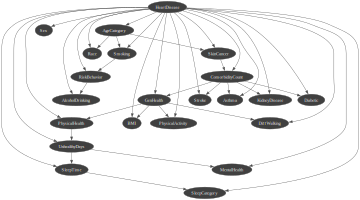

In [ ]:
with open('bayesian_network_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
gnb.showBN(bnc.bn)

Bayesian Network: The bayesian network centralizes around HeartDisease and its variables that affect it. Some of the important key variables are AgeCategory, ComobidityCount, GenHealth, and Sex. If you go throw the network some things such as ComorbidityCount are influenced by many different variables. These variables are GenHealth, KidneyDisease, Stroke, Diabetic, and Asthma which would all make sense when talking about ComorbidityCount. Some other important connects are RiskBehavior with Smoking and AlcoholDrinking which also do make sense. Overall the network does show that alot of different variables are important to factor when analyzing HeartDisease. This model has an accuracy train/test accuracy aroud 73-74%.

7. Clustering

In [ ]:
import pickle
from sklearn.metrics import mean_squared_error, r2_score

# Load the necessary libraries
import numpy as np
import pandas as pd
# Define the model filename
clustering_model_filename = "clustering_model.p"

# Open the file in read-binary mode and load the model
with open(clustering_model_filename, "rb") as file:
    kmeans_model = pickle.load(file)

print("Clustering model successfully loaded.")

Clustering model successfully loaded.


In [ ]:
# Display the clustering model
print("\nLoaded Clustering Model:")
print(kmeans_model)


Loaded Clustering Model:
KMeans(n_clusters=2, n_init=10, random_state=42)


8. Neural Networks

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving neural_net_model.p to neural_net_model.p


In [ ]:
import pickle
from tensorflow.keras.models import model_from_json

# Define the wrapper class (must be included again in Colab)
class KerasModelWrapper:
    def __init__(self, model):
        self.model_json = model.to_json()
        self.model_weights = model.get_weights()

    def load_model(self):
        model = model_from_json(self.model_json)
        model.set_weights(self.model_weights)
        return model

# Load the model from the uploaded file
with open("neural_net_model.p", "rb") as f:
    wrapper = pickle.load(f)

nn_model = wrapper.load_model()
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
nn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

The Neural Network was trained to predict the likelihood of heart disease using all available features in the dataset. One of the major challenges we faced was class imbalance — only about 9% of the data had heart disease cases, which led to very high accuracy but poor detection of actual disease cases in the baseline model.

To address this, we used class weighting, which forces the model to “care more” about the minority class (heart disease). After applying this, performance improved significantly on key metrics like recall and F1-score for the heart disease class.

The model architecture included:

An input layer connected to two hidden layers with ReLU activation

A final output layer with a sigmoid activation for binary classification

After training for 30 epochs, the model showed strong improvement:

Baseline model: Accuracy ~92%, but Recall (1) was only 15%

Balanced model: Accuracy ~76%, but Recall (1) increased to 79%

This trade-off shows that while overall accuracy dropped, the model became much better at identifying people with heart disease, which is the real-world priority. This model emphasizes how neural networks can be tuned to solve imbalanced classification problems effectively using weighting.